In [1]:
from numpy import *
from matplotlib.pyplot import * 
import matplotlib.pyplot as plt
import util, dr, datasets, softmax, runClassifier  
from utils import *
from softmax import *
from runClassifier import *

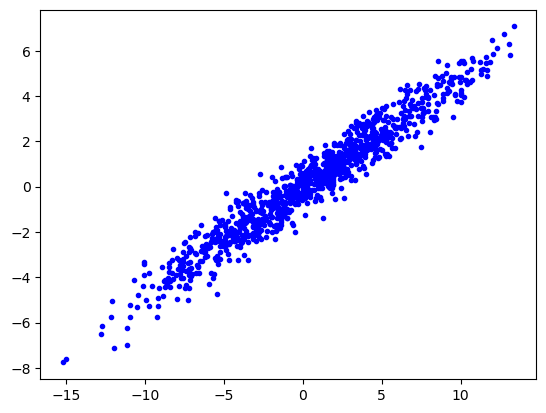

array([[26.18828362, 12.38687024],
       [12.38687024,  6.24247454]])

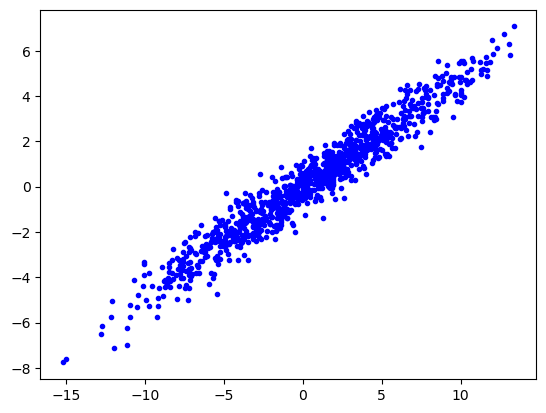

In [9]:
Si = util.sqrt(array([[3,2],[22,4]]))
x = dot(random.randn(1000,2), Si)
plot(x[:,0], x[:,1], 'b.')
show(False)
dot(x.T,x)/real(x.shape[0] - 1)

In [10]:
(P, Z, evals) = dr.pca(x,2)
Z

array([[ 0.90201048, -0.43171413],
       [ 0.43171413,  0.90201048]])

In [11]:
evals

array([31.83153594,  0.31273565])

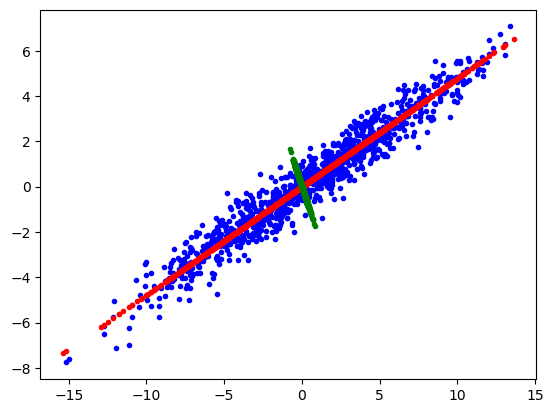

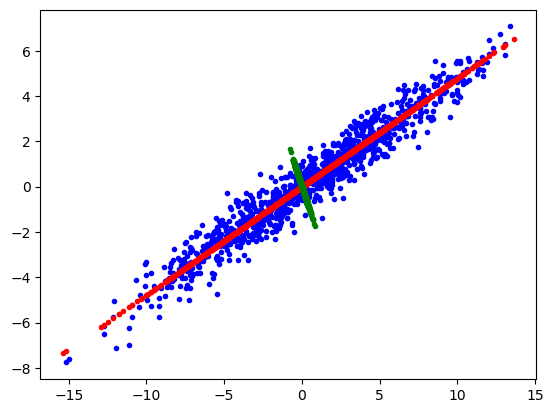

In [12]:
x0 = dot(dot(x, Z[:,0]).reshape(1000,1), Z[:,0].reshape(1,2))
x1 = dot(dot(x, Z[:,1]).reshape(1000,1), Z[:,1].reshape(1,2))
plot(x[:,0], x[:,1], 'b.', x0[:,0], x0[:,1], 'r.', x1[:,0], x1[:,1], 'g.')
show(False)

In [14]:
(X,Y) = datasets.loadDigits()
(P1,Z1,evals1) = dr.pca(X, 784)
evals

array([ 5.47145902e-02,  4.32457401e-02,  3.91832356e-02,  3.07589801e-02,
        2.97240699e-02,  2.48634922e-02,  1.98552656e-02,  1.75982431e-02,
        1.57833269e-02,  1.31208707e-02,  1.27918802e-02,  1.18266157e-02,
        1.12559221e-02,  1.00752373e-02,  9.36845932e-03,  8.73601732e-03,
        8.27005062e-03,  7.92899274e-03,  7.23521657e-03,  6.85924774e-03,
        6.42706546e-03,  6.14996142e-03,  5.91821028e-03,  5.67737906e-03,
        5.40356132e-03,  5.30190215e-03,  5.02203749e-03,  4.59637089e-03,
        4.42538322e-03,  4.36981194e-03,  4.16187116e-03,  4.11031674e-03,
        3.77459052e-03,  3.62187854e-03,  3.41085954e-03,  3.28497607e-03,
        3.23280900e-03,  3.19587689e-03,  3.02982002e-03,  2.87978872e-03,
        2.83078667e-03,  2.74927351e-03,  2.62589089e-03,  2.54642734e-03,
        2.47927464e-03,  2.37555612e-03,  2.29383593e-03,  2.28594556e-03,
        2.20977922e-03,  2.08730066e-03,  1.99999581e-03,  1.96943065e-03,
        1.92821820e-03,  

Qpca2: 

81
135


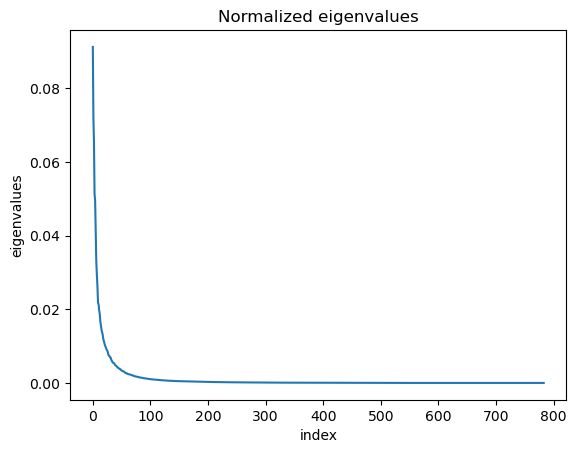

In [18]:
#code for Qpca2:
normal_evals = evals1/sum(evals)
index = range(0, len(normal_evals))
plot(index, normal_evals)
xlabel('index')
ylabel('eigenvalues')
title('Normalized eigenvalues')

cum_sum = cumsum(normal_evals)
print(argmax(cum_sum > 0.9))
print(argmax(cum_sum > 0.95))

Qpca2: 
There are 81 eigenvectors we need to inlcuded before we've accounted for 90% of the variance. For 95% of the variance, the number goes up to 135.

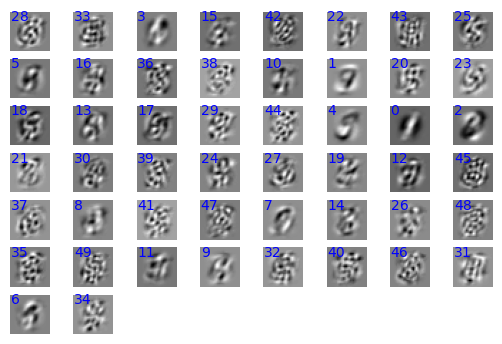

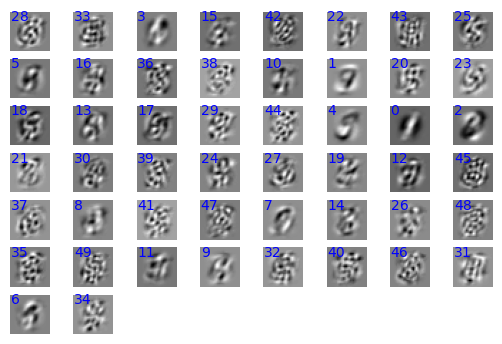

In [17]:
#Qpca3:
util.drawDigits(Z.T[:50,:], arange(50))
show(False)

Qpca3: These graphs do not exactly look like digit. Some of them somewhat resemble the digits but most of them are not very clear. They are being blurry due to the fact that projecting the eigenvectors onto the top 50 eigenvectors yeilds 82.7% accuracy of the total variance of the dataset. Hence, we compress the image to a lower dimension, which explains why the graphs are not clearly defined. 

#Part2: Softmax Regression. 
Qsr1: Use Latex to prove. 
Qrs2: 
Qsr3: 
1)
2)This might be an optimization over using W_X because when we calculate the cost, a large value x can create a wrong value for total cost. The exponent of a large number is very significant. Hence, when divide with the exponent of a large number, the calculation might go wrong. Therefore, using this function might be better. 

In [4]:
#code for Qrs4:
# MNIST images are 28 * 28
exSize = 28*28
# 10 digits
numClasses = 10
# Regularizer coefficient
X, Y = loadMNIST('data/train-images.idx3-ubyte', 'data/train-labels.idx1-ubyte')
sm = SoftmaxRegression(numClasses, exSize)
testX, testY = loadMNIST('data/t10k-images.idx3-ubyte', 'data/t10k-labels.idx1-ubyte')
predictions = sm.predict(X)
(data_size, train_acc, test_acc) = learningCurve(sm, numClasses, exSize, X, Y, testX, testY)
print(data_size)

60000
16
1
(784, 2)
(2,)
Training classifier on 2 points...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7840     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45388D+00    |proj g|=  4.50000D-01

At iterate    1    f=  7.54791D-01    |proj g|=  2.56845D-01

At iterate    2    f=  7.35419D-01    |proj g|=  2.49947D-01

At iterate    3    f=  6.93397D-01    |proj g|=  2.49922D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7840      4     59      2     0     0   2.499D-01   6.934D-01
  F =  0.69339723797348007     

ABNORMAL_

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f=  4.11109D-01    |proj g|=  2.28940D-02

At iterate    5    f=  2.45314D-01    |proj g|=  1.91733D-02

At iterate    6    f=  8.98552D-02    |proj g|=  9.57844D-03

At iterate    7    f=  5.13959D-02    |proj g|=  1.92617D-02

At iterate    8    f=  8.05702D-03    |proj g|=  2.17717D-03

At iterate    9    f=  5.82053D-03    |proj g|=  1.29315D-03

At iterate   10    f=  4.90646D-03    |proj g|=  1.02046D-03

At iterate   11    f=  3.05427D-03    |proj g|=  4.44452D-04

At iterate   12    f=  1.96168D-03    |proj g|=  2.77390D-04

At iterate   13    f=  1.12779D-03    |proj g|=  1.43559D-04

At iterate   14    f=  6.71043D-04    |proj g|=  6.79248D-05

At iterate   15    f=  4.12220D-04    |proj g|=  1.16139D-04

At iterate   16    f=  2.15119D-04    |proj g|=  2.46887D-05

At iterate   17    f=  1.58105D-04    |proj g|=  1.81067D-05

At iterate   18    f=  8.12519D-05    |proj g|=  1.07499D-05

At iterate   19    f=  5.57072D-05    |proj g|=  1.95780D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   16    f=  1.11189D-02    |proj g|=  1.69133D-03

At iterate   17    f=  8.16900D-03    |proj g|=  6.78102D-04

At iterate   18    f=  6.81860D-03    |proj g|=  5.85431D-04

At iterate   19    f=  4.56145D-03    |proj g|=  3.36876D-04

At iterate   20    f=  4.02714D-03    |proj g|=  9.71277D-04

At iterate   21    f=  2.70890D-03    |proj g|=  2.43173D-04

At iterate   22    f=  2.44660D-03    |proj g|=  1.70024D-04

At iterate   23    f=  1.96683D-03    |proj g|=  9.22846D-05

At iterate   24    f=  1.65483D-03    |proj g|=  7.45318D-05

At iterate   25    f=  1.42337D-03    |proj g|=  2.71772D-04

At iterate   26    f=  1.12517D-03    |proj g|=  8.12850D-05

At iterate   27    f=  1.01001D-03    |proj g|=  5.33621D-05

At iterate   28    f=  7.90151D-04    |proj g|=  4.38575D-05

At iterate   29    f=  6.62447D-04    |proj g|=  9.40397D-05

At iterate   30    f=  5.51187D-04    |proj g|=  3.57869D-05

At iterate   31    f=  4.96282D-04    |proj g|=  2.79528D-05

At iter

 This problem is unconstrained.



At iterate   33    f=  3.97531D-03    |proj g|=  1.95118D-04

At iterate   34    f=  3.77127D-03    |proj g|=  6.64534D-04

At iterate   35    f=  3.13654D-03    |proj g|=  1.53163D-04

At iterate   36    f=  2.97168D-03    |proj g|=  1.01824D-04

At iterate   37    f=  2.74215D-03    |proj g|=  1.16683D-04

At iterate   38    f=  2.60888D-03    |proj g|=  2.40934D-04

At iterate   39    f=  2.40247D-03    |proj g|=  1.37360D-04

At iterate   40    f=  2.16976D-03    |proj g|=  8.35752D-05

At iterate   41    f=  1.94394D-03    |proj g|=  1.11436D-04

At iterate   42    f=  1.85471D-03    |proj g|=  2.95474D-04

At iterate   43    f=  1.61828D-03    |proj g|=  1.33383D-04

At iterate   44    f=  1.52031D-03    |proj g|=  7.76570D-05

At iterate   45    f=  1.36981D-03    |proj g|=  6.78662D-05

At iterate   46    f=  1.19867D-03    |proj g|=  7.10944D-05

At iterate   47    f=  1.09664D-03    |proj g|=  1.13787D-04

At iterate   48    f=  9.24899D-04    |proj g|=  5.80508D-05

At iter

 This problem is unconstrained.



At iterate    9    f=  4.65868D-01    |proj g|=  8.26349D-03

At iterate   10    f=  4.44192D-01    |proj g|=  3.42502D-03

At iterate   11    f=  4.26394D-01    |proj g|=  2.65270D-03

At iterate   12    f=  3.93794D-01    |proj g|=  4.40625D-03

At iterate   13    f=  3.58253D-01    |proj g|=  7.07892D-03

At iterate   14    f=  3.31516D-01    |proj g|=  5.24041D-03

At iterate   15    f=  3.09746D-01    |proj g|=  3.03403D-03

At iterate   16    f=  2.94164D-01    |proj g|=  4.37849D-03

At iterate   17    f=  2.71277D-01    |proj g|=  3.66910D-03

At iterate   18    f=  2.38242D-01    |proj g|=  4.71460D-03

At iterate   19    f=  2.23241D-01    |proj g|=  4.57030D-03

At iterate   20    f=  2.05692D-01    |proj g|=  2.73520D-03

At iterate   21    f=  1.89468D-01    |proj g|=  2.30162D-03

At iterate   22    f=  1.78145D-01    |proj g|=  2.26364D-03

At iterate   23    f=  1.60802D-01    |proj g|=  2.70256D-03

At iterate   24    f=  1.44063D-01    |proj g|=  4.85804D-03

At iter

 This problem is unconstrained.



At iterate    0    f=  1.23260D+00    |proj g|=  4.40204D-03

At iterate    1    f=  1.19851D+00    |proj g|=  4.23543D-03

At iterate    2    f=  1.17325D+00    |proj g|=  3.22072D-03

At iterate    3    f=  1.08138D+00    |proj g|=  6.82248D-03

At iterate    4    f=  1.01066D+00    |proj g|=  4.20362D-03

At iterate    5    f=  9.51270D-01    |proj g|=  3.53640D-03

At iterate    6    f=  9.21993D-01    |proj g|=  3.49142D-03

At iterate    7    f=  8.77467D-01    |proj g|=  4.63385D-03

At iterate    8    f=  8.06536D-01    |proj g|=  4.84170D-03

At iterate    9    f=  7.90686D-01    |proj g|=  6.80218D-03

At iterate   10    f=  7.38939D-01    |proj g|=  2.85138D-03

At iterate   11    f=  7.16043D-01    |proj g|=  2.76407D-03

At iterate   12    f=  6.70893D-01    |proj g|=  3.72392D-03

At iterate   13    f=  6.46056D-01    |proj g|=  7.09709D-03

At iterate   14    f=  6.15185D-01    |proj g|=  2.94360D-03

At iterate   15    f=  5.92350D-01    |proj g|=  2.87491D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.42990D+00    |proj g|=  3.76280D-03

At iterate   11    f=  1.40955D+00    |proj g|=  2.11316D-03

At iterate   12    f=  1.38975D+00    |proj g|=  2.23483D-03

At iterate   13    f=  1.35897D+00    |proj g|=  2.93045D-03

At iterate   14    f=  1.32222D+00    |proj g|=  2.85411D-03

At iterate   15    f=  1.29670D+00    |proj g|=  5.22802D-03

At iterate   16    f=  1.26040D+00    |proj g|=  2.10212D-03

At iterate   17    f=  1.24240D+00    |proj g|=  1.75208D-03

At iterate   18    f=  1.21776D+00    |proj g|=  4.36940D-03

At iterate   19    f=  1.19305D+00    |proj g|=  3.65316D-03

At iterate   20    f=  1.17337D+00    |proj g|=  2.26644D-03

At iterate   21    f=  1.14744D+00    |proj g|=  2.58340D-03

At iterate   22    f=  1.13305D+00    |proj g|=  2.09519D-03

At iterate   23    f=  1.10759D+00    |proj g|=  2.67772D-03

At iterate   24    f=  1.06944D+00    |proj g|=  2.17755D-03

At iterate   25    f=  1.05322D+00    |proj g|=  3.84515D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  9.61265D-01    |proj g|=  2.73159D-03

At iterate    6    f=  9.50354D-01    |proj g|=  1.62143D-03

At iterate    7    f=  9.44060D-01    |proj g|=  1.90262D-03

At iterate    8    f=  9.32893D-01    |proj g|=  3.29637D-03

At iterate    9    f=  9.29500D-01    |proj g|=  5.64559D-03

At iterate   10    f=  9.11483D-01    |proj g|=  1.65126D-03

At iterate   11    f=  9.05452D-01    |proj g|=  1.66970D-03

At iterate   12    f=  8.97649D-01    |proj g|=  2.10359D-03

At iterate   13    f=  8.84725D-01    |proj g|=  2.17642D-03

At iterate   14    f=  8.80491D-01    |proj g|=  3.56013D-03

At iterate   15    f=  8.71292D-01    |proj g|=  1.41034D-03

At iterate   16    f=  8.65236D-01    |proj g|=  1.54095D-03

At iterate   17    f=  8.54582D-01    |proj g|=  1.55632D-03

At iterate   18    f=  8.49817D-01    |proj g|=  3.10869D-03

At iterate   19    f=  8.41818D-01    |proj g|=  2.23016D-03

At iterate   20    f=  8.33978D-01    |proj g|=  1.31550D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  5.31404D-01    |proj g|=  4.74214D-03

At iterate    3    f=  5.02349D-01    |proj g|=  3.67615D-03

At iterate    4    f=  4.98815D-01    |proj g|=  1.23197D-02

At iterate    5    f=  4.84652D-01    |proj g|=  4.27436D-03

At iterate    6    f=  4.78740D-01    |proj g|=  1.73815D-03

At iterate    7    f=  4.73152D-01    |proj g|=  2.44985D-03

At iterate    8    f=  4.66793D-01    |proj g|=  2.16555D-03

At iterate    9    f=  4.58732D-01    |proj g|=  6.12682D-03

At iterate   10    f=  4.49284D-01    |proj g|=  2.18362D-03

At iterate   11    f=  4.46200D-01    |proj g|=  1.75274D-03

At iterate   12    f=  4.42067D-01    |proj g|=  1.40869D-03

At iterate   13    f=  4.37878D-01    |proj g|=  1.72382D-03

At iterate   14    f=  4.34933D-01    |proj g|=  2.39635D-03

At iterate   15    f=  4.31018D-01    |proj g|=  1.49415D-03

At iterate   16    f=  4.28416D-01    |proj g|=  1.22139D-03

At iterate   17    f=  4.24712D-01    |proj g|=  1.50580D-03

At iter

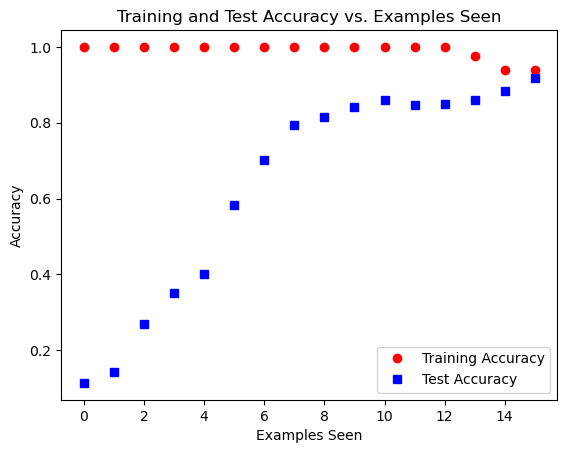

In [6]:
plt.plot(train_acc, 'ro')
plt.plot(test_acc, 'bs')
plt.ylabel('Accuracy')
plt.xlabel('Examples Seen')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title('Training and Test Accuracy vs. Examples Seen')
plt.show()

QRS4: When the examples is low, the overfit occurs. When there are more examples, the overfit dereases. When it passes 14, the accuracy of training and testing are the same. 